In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp


# Initialiserer pen visning av uttrykkene
sp.init_printing()

# Plotteparametre for å få store, tydelige plott som utnytter tilgjengelig skjermareal
fontsize = 20
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (16, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.5}
plt.rcParams.update(newparams)

In [2]:
# Definerer variablene som inngår i uttrykkene for Biot-Savarts lov for alle geometriene
mu0, I, R, N, l, x, z, a = sp.symbols('mu0 I R N l x z a')

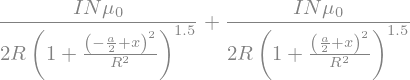

In [7]:
helmholtz = (N*mu0*I)/(2*R) * (1 + (x - a/2)**2/R**2)**(-3/2) + (N*mu0*I)/(2*R) * (1 + (x + a/2)**2/R**2)**(-3/2)
helmholtz

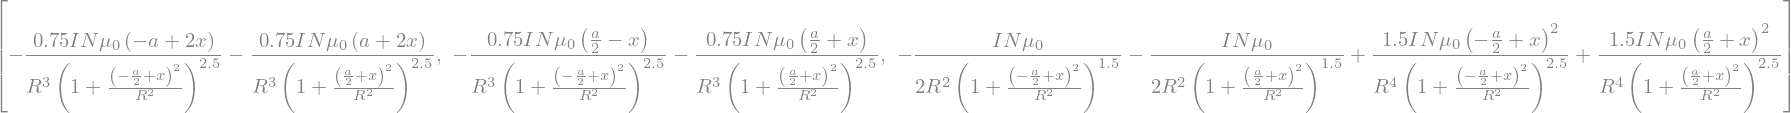

In [9]:
dBbd = [ sp.diff(helmholtz, x), sp.diff(helmholtz, a), sp.diff(helmholtz, R)]
dBbd

In [16]:
from Helmholtzspoler import get_data
x1, y1 = np.array(get_data("data/helmholtzspoler/2R.csv"))
x2, y2 = np.array(get_data("data/helmholtzspoler/R_2.csv"))
x3, y3 = np.array(get_data("data/helmholtzspoler/R.csv"))

In [26]:
x_vals_1 = np.linspace(x1[0], x1[-1], len(x1))
x_vals_2 = np.linspace(x2[0], x2[-1], len(x2))
x_vals_3 = np.linspace(x3[0], x3[-1], len(x3))

Be1 = [helmholtz.subs([(N, 330), (I, 1), (a, 0.14), (mu0, 4*np.pi*1e-7), (R, 0.07), (x, xbi)])*1e4 for xbi in x_vals_1]
Be2 = [helmholtz.subs([(N, 330), (I, 1), (a, 0.035), (mu0, 4*np.pi*1e-7), (R, 0.07), (x, xbi)])*1e4 for xbi in x_vals_2]
Be3 = [helmholtz.subs([(N, 330), (I, 1), (a, 0.07), (mu0, 4*np.pi*1e-7), (R, 0.07), (x, xbi)])*1e4 for xbi in x_vals_3]

Be1 = np.array(Be1).astype(np.float64)
Be2 = np.array(Be2).astype(np.float64)
Be3 = np.array(Be3).astype(np.float64)

$$
\Delta B_\mathrm{b} = \sqrt{\left(\frac{\partial B_\mathrm{b}}{\partial x_\mathrm{b}} \cdot \Delta x_\mathrm{b}\right)^2
+ \left(\frac{\partial B_\mathrm{b}}{\partial I} \cdot \Delta R\right)^2
+ \left(\frac{\partial B_\mathrm{b}}{\partial R} \cdot \Delta a\right)^2}.
$$